# Import the libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
! pip install mglearn
import mglearn
from IPython.display import display
import statsmodels.api as sm
import statsmodels
from statsmodels.stats.diagnostic import het_white
import missingno as msno
%matplotlib notebook
import pandas_profiling as pdp

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.simplefilter('ignore')

path = path = "/content/drive/My Drive/yuzy_portfolio/yuzy_portfolio/Economics"

     |████████████████████████████████| 542kB 8.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5e34a6dfe7d6268ba9509b7ec3d1bd8203090a934ed37a6639cd804b17973c94
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel(path+"/working_data/wage1.xls")
data.columns = ["wage","educ", "exper", "tenure", "nonwhite", "female", "married", "numdep",
                "smsa", "northcen", "south", "west", "construc", "ndurman", "trcommpu", "trade", 
                "services", "profserv", "profocc", "clerocc", "servocc", "lwage", "expersq", "tenurs", ]

# Check the data

In [3]:
data.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenurs
0,3.10,11,2,0,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,0,1,0,0,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

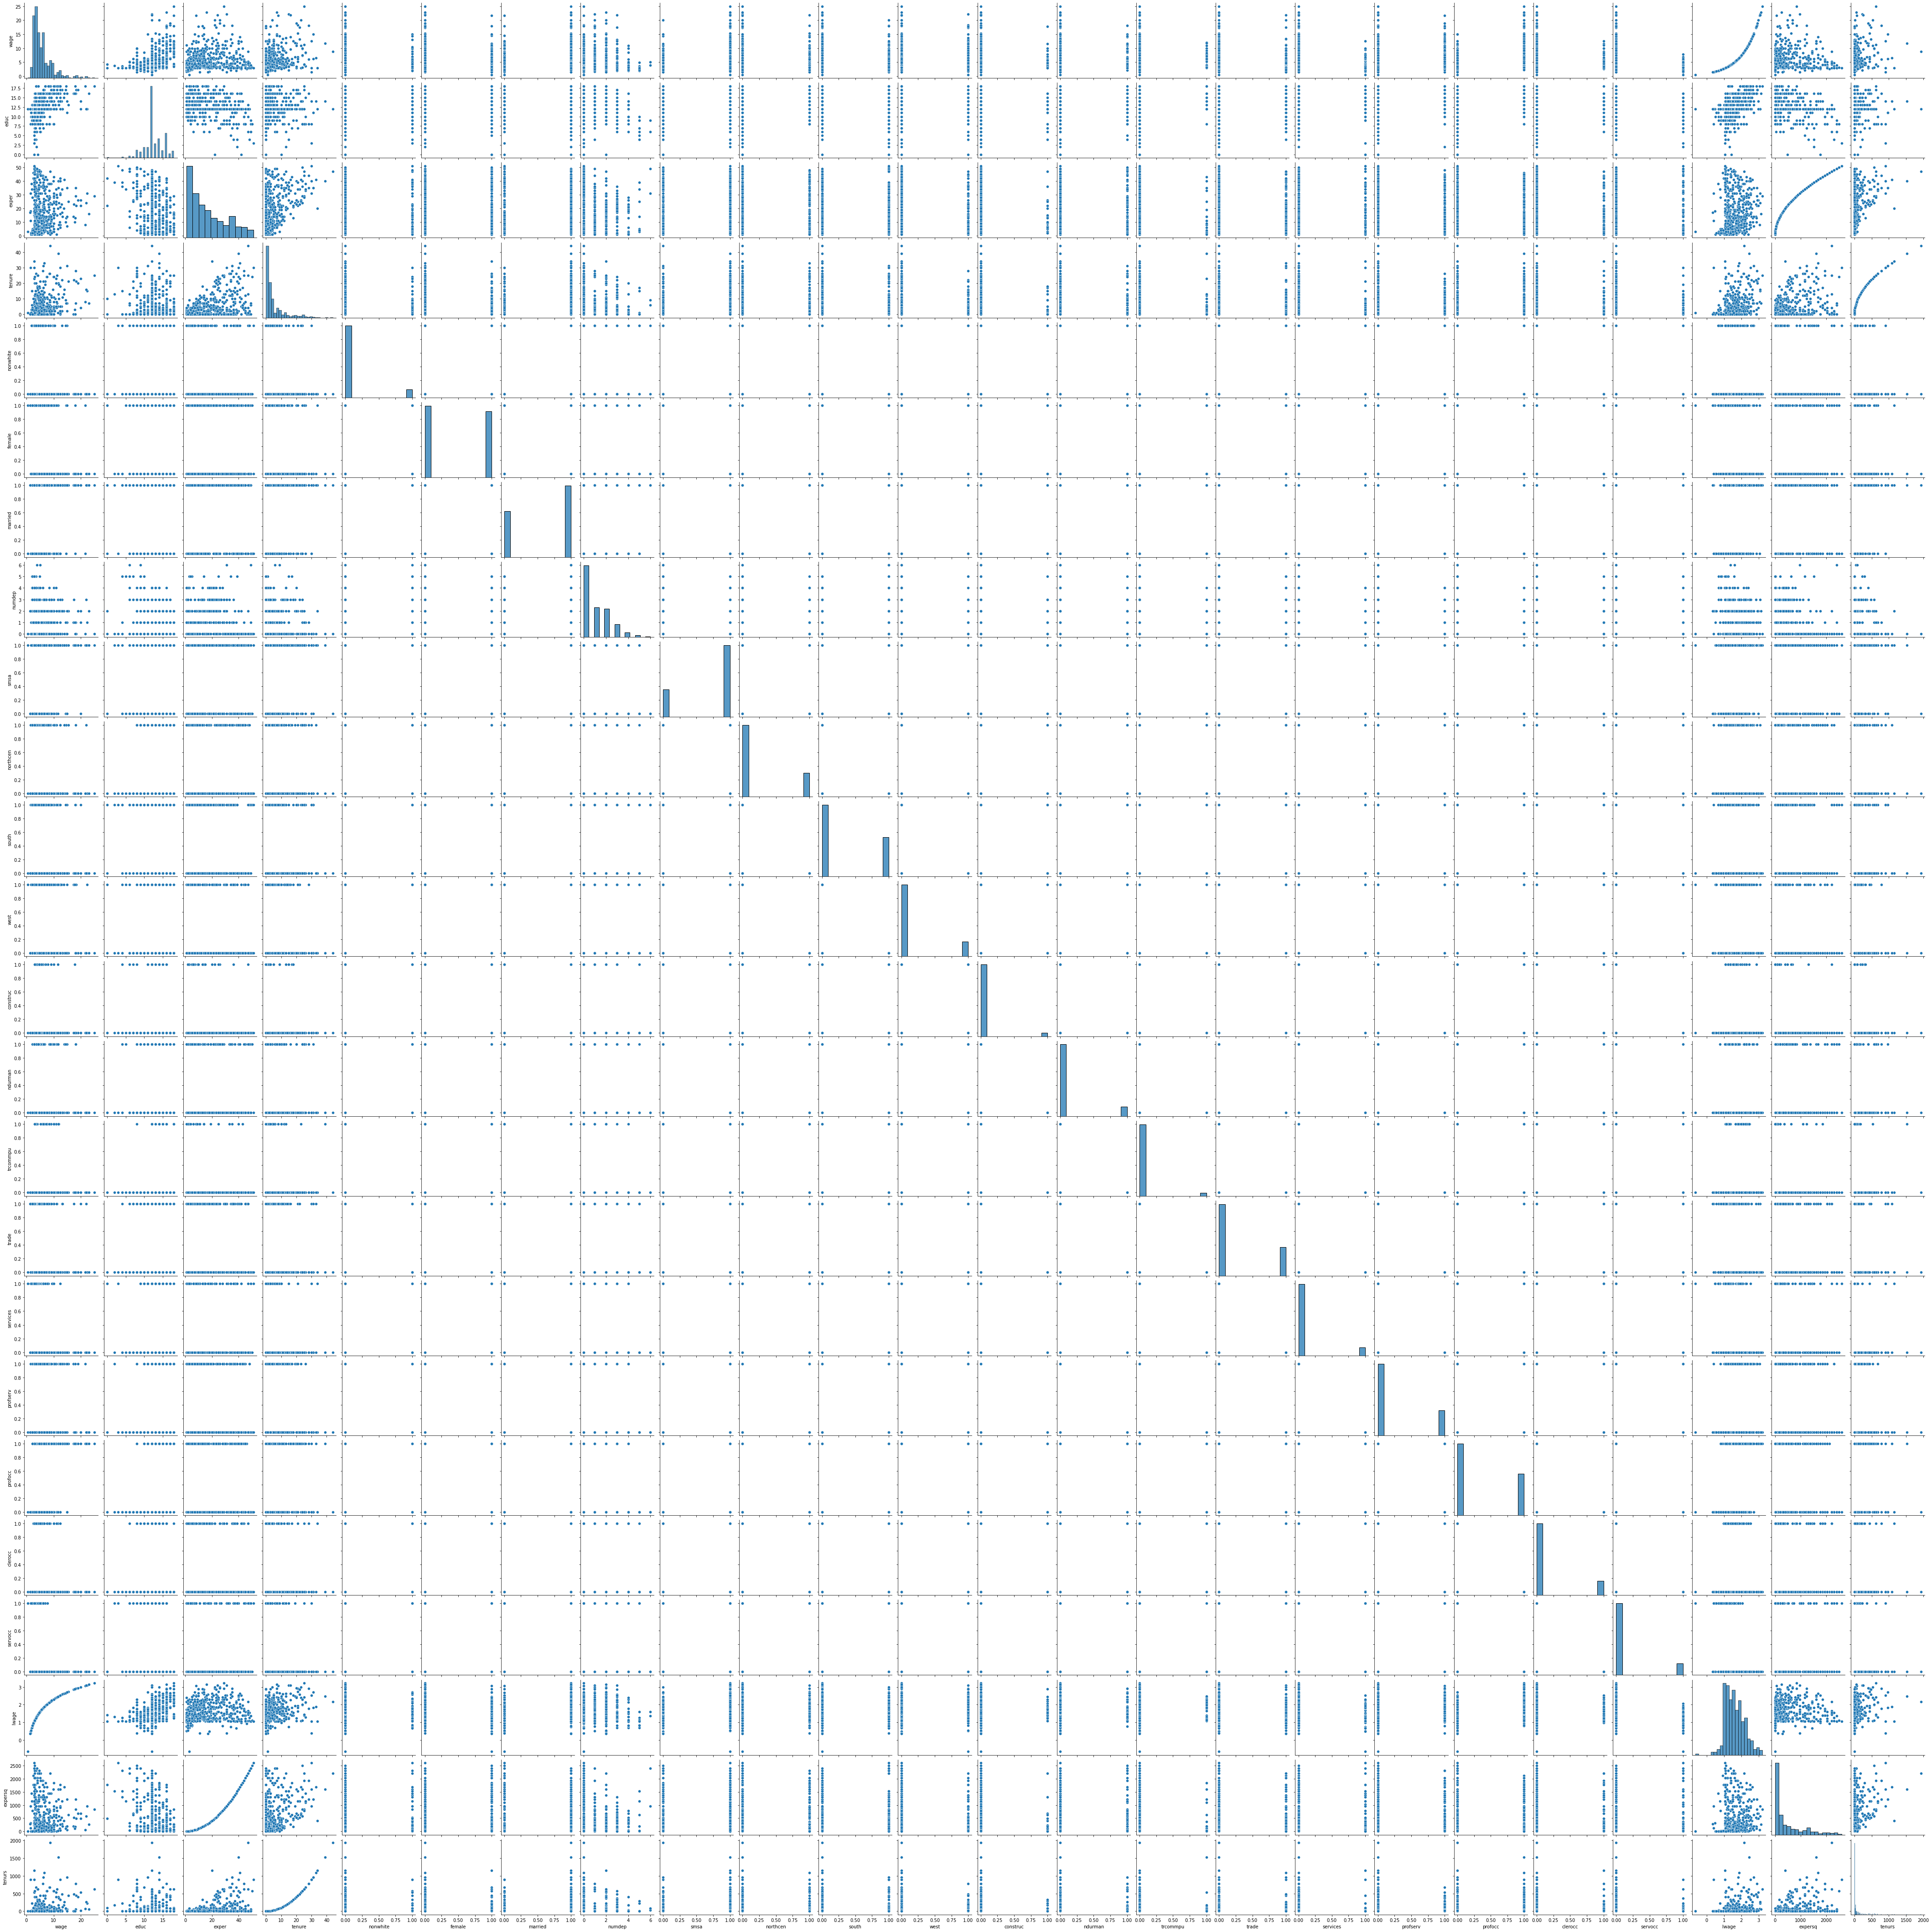

In [5]:
# Create pariplot
sns.pairplot(data)

# Problem

Consider the models
Model 1: log(𝑤𝑎𝑔𝑒) = 𝛽0 + 𝛽1 * 𝑓𝑒𝑚𝑎𝑙𝑒 + 𝛽2 * 𝑚𝑎𝑟𝑟𝑖𝑒𝑑 + 𝛽3 * 𝑠𝑚𝑠𝑎 + 𝛽4 * 𝑒𝑑𝑢𝑐 + 𝛽5 * 𝑡𝑒𝑛𝑢𝑟𝑒 + 𝛽6 * 𝑒𝑥𝑝𝑒𝑟 + 𝑢
Model 2: log(𝑤𝑎𝑔𝑒) = 𝛾0 + 𝛾1 * 𝑓𝑒𝑚𝑎𝑙𝑒 + 𝛾2 * 𝑚𝑎𝑟𝑟𝑖𝑒𝑑 + 𝛾3 * 𝑓𝑒𝑚𝑎𝑙𝑒 * 𝑚𝑎𝑟𝑟𝑖𝑒𝑑 + 𝛾4 * 𝑠𝑚𝑠𝑎 + 𝛾5 * 𝑒𝑑𝑢𝑐 + 𝛾6 * 𝑡𝑒𝑛𝑢𝑟𝑒 + 𝛾7 * 𝑒𝑥𝑝𝑒𝑟 + 𝛾8 * 𝑒𝑥𝑝𝑒𝑟**2 + v

## (ⅰ)

Estimate Models 1 and 2 under Assumptions MLR.1–MLR.4. Because the error terms are not assumed
to be homoskedastic, use the heteroskedasticity-robust standard errors. Report the results of the two
models in a table.

In [6]:
# model1
#  log(𝑤𝑎𝑔𝑒) = 𝛽0 + 𝛽1 * 𝑓𝑒𝑚𝑎𝑙𝑒 + 𝛽2 * 𝑚𝑎𝑟𝑟𝑖𝑒𝑑 + 𝛽3 * 𝑠𝑚𝑠𝑎 + 𝛽4 * 𝑒𝑑𝑢𝑐 + 𝛽5 * 𝑡𝑒𝑛𝑢𝑟𝑒 + 𝛽6 * 𝑒𝑥𝑝𝑒𝑟 + u


# Choose the variables
y = data["lwage"]
x2 = data[["female","married", "smsa", "educ", "tenure", "exper"]]

# Run the regression
x = sm.add_constant(x2)
model1 = sm.OLS(y,x).fit()

# Show the results
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     62.87
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           1.66e-58
Time:                        19:56:13   Log-Likelihood:                -269.77
No. Observations:                 526   AIC:                             553.5
Df Residuals:                     519   BIC:                             583.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4381      0.101      4.355      0.000       0.240       0.636
female        -0.2898      0.037     -7.880      0.000      -0.362      -0.218
married        0.1419      0.040      3.577      0.000       0.064       0.220
smsa           0.1614      0.041      3.935      0.000       0.081       0.242
educ           0.0781      0.007     11.096      0.000       0.064       0.092
tenure         0.0162      0.003      5.536      0.000       0.010       0.022
exper          0.0034      0.002      2.046      0.041       0.000       0.007
==============================================================================
Omnibus:                       14.583   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.449
Skew:                           0.088   Prob(JB):                     6.64e-07
Kurtosis:                       4.126   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# model2
# log(𝑤𝑎𝑔𝑒) = 𝛾0 + 𝛾1 * 𝑓𝑒𝑚𝑎𝑙𝑒 + 𝛾2 * 𝑚𝑎𝑟𝑟𝑖𝑒𝑑 + 𝛾3 * 𝑓𝑒𝑚𝑎𝑙𝑒 * 𝑚𝑎𝑟𝑟𝑖𝑒𝑑 + 
#              𝛾4 * 𝑠𝑚𝑠𝑎 + 𝛾5 * 𝑒𝑑𝑢𝑐 + 𝛾6 * 𝑡𝑒𝑛𝑢𝑟𝑒 + 𝛾7 * 𝑒𝑥𝑝𝑒𝑟 + 𝛾8 * 𝑒𝑥𝑝𝑒𝑟**2 + vv
# Generate the variables for model 2
data["fem_mar"] = data["female"] * data["married"]

# Choose the variables
y = data["lwage"]
x2 = data[["female","married", "fem_mar", "smsa", "educ", "tenure", "exper", "expersq"]]

# Run the regression
x = sm.add_constant(x2)
model2 = sm.OLS(y,x).fit()

# Show the results
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     57.68
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           7.57e-67
Time:                        19:56:13   Log-Likelihood:                -245.67
No. Observations:                 526   AIC:                             509.3
Df Residuals:                     517   BIC:                             547.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2702      0.100      2.711      0.007       0.074       0.466
female        -0.1188      0.055     -2.150      0.032      -0.227      -0.010
married        0.2280      0.055      4.164      0.000       0.120       0.336
fem_mar       -0.2950      0.071     -4.151      0.000      -0.435      -0.155
smsa           0.1568      0.039      3.991      0.000       0.080       0.234
educ           0.0738      0.007     10.900      0.000       0.061       0.087
tenure         0.0143      0.003      5.086      0.000       0.009       0.020
exper          0.0302      0.005      5.996      0.000       0.020       0.040
expersq       -0.0006      0.000     -5.605      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       18.012   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.175
Skew:                          -0.049   Prob(JB):                     1.15e-09
Kurtosis:                       4.367   Cond. No.                     5.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model1.HC0_se

const      0.112666
female     0.037204
married    0.039314
smsa       0.040578
educ       0.008079
tenure     0.003434
exper      0.001551
dtype: float64

In [9]:
model2.HC0_se

const      0.107541
female     0.056613
married    0.056404
fem_mar    0.071541
smsa       0.039726
educ       0.007587
tenure     0.003289
exper      0.004759
expersq    0.000098
dtype: float64

## (ⅱ)

For Model 2, using the approximation %Δ𝑤̂𝑎𝑔𝑒 = 100(𝛾̂7 + 2𝛾̂8𝑒𝑥𝑝𝑒𝑟)Δ𝑒𝑥𝑝𝑒𝑟, find the approximate
return to the twentieth year of experience and its standard error (When reporting numbers, be
careful to clearly write the units of them).

In [10]:
# perc_delta_wage = 100 * (ganma_7_hat + 2 * ganma_8_hat * exper) * delta_exper

ganma_7_hat =  0.0302
ganma_8_hat = -0.0006
exper = 19
delta_exper = 1
perc_delta_wage = 100 * (ganma_7_hat + 2 * ganma_8_hat * exper) * delta_exper

In [11]:
perc_delta_wage

0.7400000000000004

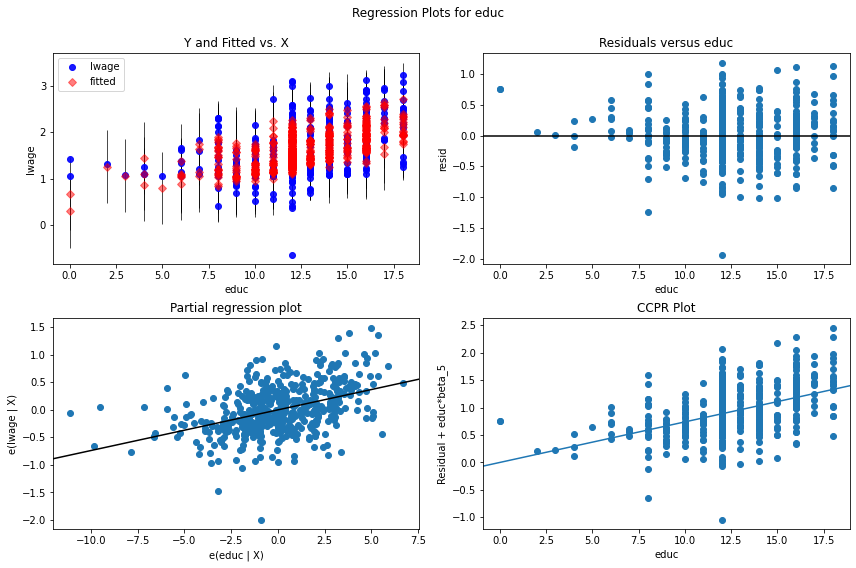

In [12]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, "educ", fig=fig)

In [13]:
#var_cap_gamma_ = 

## (ⅲ)

In [14]:
turnaround = -(ganma_7_hat / (2 * ganma_8_hat))

In [15]:
turnaround

25.16666666666667

In [16]:
len(data[data.exper >= 25.166])

141

For Model 2, at what value of 𝑒𝑥𝑝𝑒𝑟 does additional experience actually lower predicted log(𝑤𝑎𝑔𝑒)?
How many people have more experience than the turnaround point in this sample?


## (ⅳ)

In [17]:
white_test = het_white(model1.resid,  model1.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 36.066882008933725, 'LM-Test p-value': 0.05407272613693275, 'F-Statistic': 1.5367325340725804, 'F-Test p-value': 0.0506182525253108}


For Model 1, test whether the error term is homoskedastic or not, by performing the White test for
heteroskedasticity at the 10% level.

## (ⅴ)

For Model 2, test whether the error term is homoskedastic or not, by performing the White test for
heteroskedasticity at the 10% level.

In [18]:
white_test2 = het_white(model2.resid,  model2.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test2)))

{'LM Statistic': 39.40661871558666, 'LM-Test p-value': 0.32005763252740327, 'F-Statistic': 1.1000421669124982, 'F-Test p-value': 0.320853552196516}


## (ⅵ)

Given that 𝑓𝑒𝑚𝑎𝑙𝑒 is statistically significant in Models 1 and 2, interpret 𝛽̂
1 and 𝛾̂1. (You do not have
to discuss statistical significance.)
